<a href="https://colab.research.google.com/github/mmbaye/SoilMoisutre_Demo/blob/main/Spatio_temporalRadarSoilMoisture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('raster')
install.packages('cptcity')

In [ ]:
library(cptcity)
library(raster)
library(tidyverse)
rasterOptions(progress = 'text')
palette <- cpt('ukmo_wow_humidity') 

class      : RasterBrick 
dimensions : 136, 243, 33048, 12  (nrow, ncol, ncell, nlayers)
resolution : 8.983153e-05, 8.983153e-05  (x, y)
extent     : 15.13535, 15.15718, 48.14835, 48.16057  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : petenRaster.tif 
names      :        Jan,        Feb,        Mar,        Apr,        May,        Jun,        Jul,        Aug,        Sep,        Oct,        Nov,        Dec 
min values : 0.21038968, 0.24365758, 0.22007260, 0.07450104, 0.06573338, 0.12130046, 0.18722726, 0.21979250, 0.22285516, 0.23200654, 0.21174335, 0.23296529 
max values :  0.3893140,  0.4229984,  0.3974209,  0.3744567,  0.3799371,  0.3896210,  0.3810847,  0.3894963,  0.3956817,  0.3918885,  0.3892855,  0.3912974 



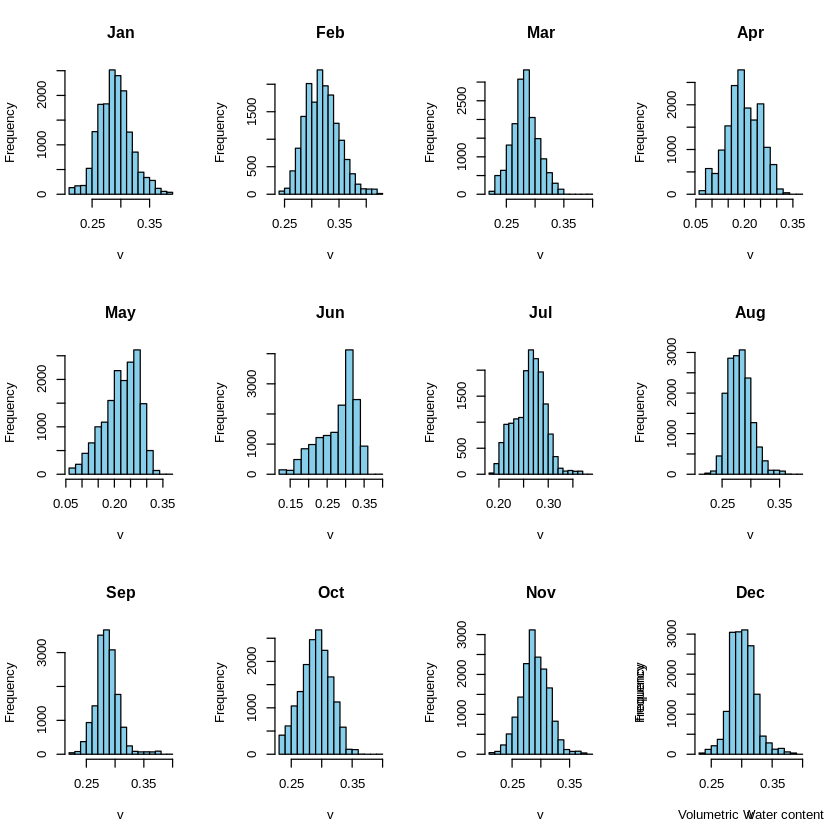

In [37]:
r<-'/content/sample_data/petenRaster.tif' %>% brick() 
names(r)<-month.abb
hist(r, col='skyblue')

In [31]:
df<-r %>% as.data.frame(xy=T, na.rm=T) %>% gather(key = 'period',value = 'VWC',-c(1,2))

# raster and shapefile

# introd

In [33]:
theme_set(theme_minimal()+
theme(title=element_text(face = 'bold', size = 12),
axis.text.y = element_text(face = 'bold',size=12),
axis.text.x = element_text(face = 'bold', size = 12),
axis.title.x = element_text(face = 'bold',size = 12),
axis.title.y = element_text(face = 'bold',size = 12),
legend.position = 'right', legend.title=element_text(face="bold", size=14),
legend.text = element_text(face="bold", size = 12)))

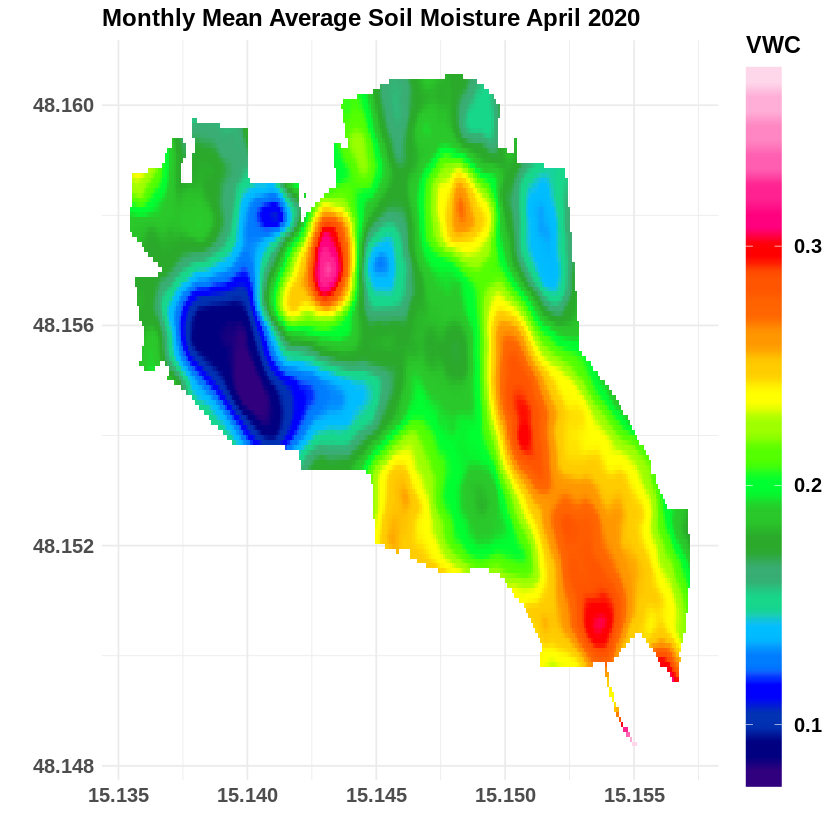

In [34]:
p4<-df %>% 
  filter(period %in% c('Apr')) %>% 
  ggplot()+
  geom_tile(mapping=aes(x,y,fill=VWC))+
  scale_fill_gradientn(name='VWC',colours=palette )+
  guides(fill=guide_colorbar(barwidth=1.5,barheight =30))+
  labs(x='',y='',title = 'Monthly Mean Average Soil Moisture April 2020')
  
p4